In [15]:
from pyDACP import core
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh
from scipy.sparse import eye, diags

In [24]:
N = 100
a = 0.4
DEG = 10
b = np.concatenate((np.ones(int(N/2 - DEG))*-1, np.ones(int(DEG))*0.2, np.ones(int(N/2))*1))
H = diags(b, offsets=0)

# N = 500
# a = 0.4
# c = np.random.rand(N-1) + np.random.rand(N-1)*1j
# b = np.random.rand(N)
# H = diags(c, offsets=-1) + diags(b, offsets=0) + diags(c.conj(), offsets=1)


dacp=core.DACP_reduction(H, a=a, eps=0.05, bounds=None, sampling_subspace=1.5)
H_red = dacp.get_subspace_matrix()
H_red.shape

(10, 10)

In [25]:
true_eigvals, true_eigvecs = eigh(H.todense())
eigvalues, eigvectors = eigh(H_red)

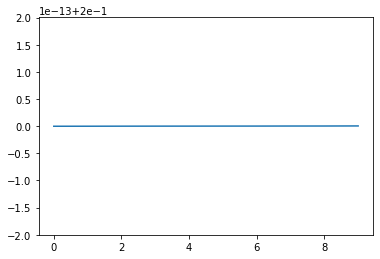

In [26]:
plt.plot(np.sort(eigvalues))

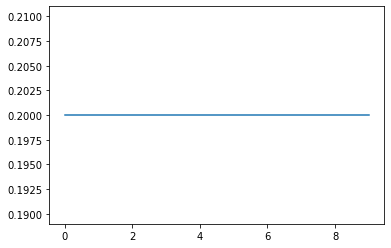

In [27]:
out_indx = a >= np.abs(true_eigvals)
plt.plot(np.sort(np.real(true_eigvals[out_indx])))